# 피처 선택 (Feature Selection)
- 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거, 데이터의 특징을 잘 나타내는 주요 피처만 선택.

# 피처 추출 (Feature Extraction)
- 기존 피처를 중요 피처로 압축해서 추출하는 것. 
- 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출. 

# PCA의 이해
- 고차원의 원본 데이터를 저차원의 부분 공간으로 투영하여 데이터를 축소하는 기법. 
- 예를 들어, 10차원의 데이터를 2차원의 부분 공간으로 투영하여 차원 축소
- 원본 데이터 변동성이 가장 큰 방향으로 순차적으로 축들을 생성. 
1. 데이터 변동성이 가장 큰 방향으로 축 생성
2. 새로운 축으로 데이터 투영
3. 새로운 축 기준으로 데이터 표현

# PCA 변환
1. 원본 데이터의 공분산 행렬 추출
2. 공분산 행렬을 고유벡터와 고유값 분해
3. 원본 데이터를 고유 벡터로 선형 변환
4. PCA 변환 값 도출
- 고유 벡터는 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타낸다.
- 고유값은 이 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타낸다.
- 입력 데이터의 개별 피처들을 스케일링해야 한다. 일반적으로 평균이 0, 분산이 1인 표준 정규 분포로 변환한다.

## 공분산 행렬
- 공분산은 두 변수 간의 변동을 의미. 즉, 사람 키 변수를 x, 몸무게 변수를 y라고 하면 공분산 Cov(x,y) > 0은 키가 증가할 때 y도 증가한다는 의미.
- 공분산 행렬은 여러 변수와 관련된 공분산을 포함하는 정방형 행렬이며 대칭 행렬. 


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


## sepal_length, sepal_width 두개의 속성으로 데이터 산포 시각화

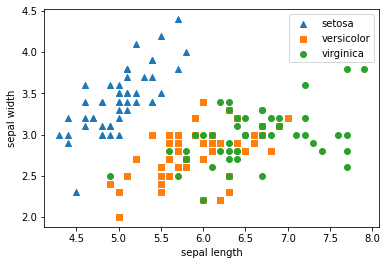

In [2]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

## 평균이 0, 분산이 1인 정규 분포로 원본 데이터를 변환 

In [3]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [4]:
iris_scaled.shape

(150, 4)

##  PCA 변환 수행

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [6]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


## PCA로 차원 축소된 피처들로 데이터 산포도 시각화

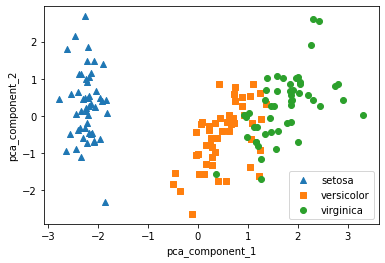

In [7]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

## 각 PCA Component별 변동성 비율

In [8]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


## 원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [10]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print(scores_pca)
print(np.mean(scores_pca))

[0.88 0.88 0.88]
0.88


# 신용카드 데이터 세트 PCA 변환

## 데이터 로드 및 컬럼명 변환

In [12]:
import pandas as pd

df = pd.read_excel('pca_credit_card.xls', sheet_name='Data', header=1)
print(df.shape)
df.head(3)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [13]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
# ID, default 컬럼 Drop
X_features = df.drop(['ID','default'], axis=1)

In [14]:
y_target.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [15]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

## 피처간 상관도 시각화

<AxesSubplot:>

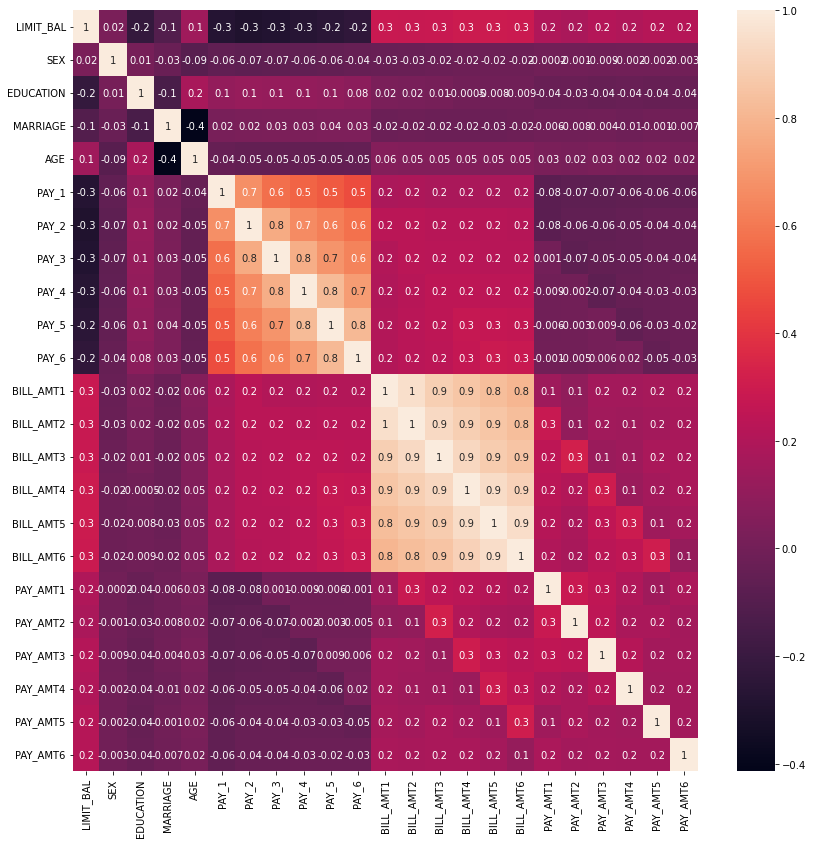

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')


## 상관도가 높은 피처들의 PCA 변환 후 변동성 확인

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)

print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


## 원본 데이터 세트와 6개 컴포넌트로 PCA 변환된 데이터 세트로 분류 예측 성능 비교

In [18]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))


CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))